# designEDチュートリアル（準備中）

## セットアップ

In [ ]:
! git clone https://github.com/chisakiShinichirouToshiyuki/designed.git

In [ ]:
!pip install sympy==1.11.1
!pip install jedi>=0.16
!pip install setuptools>65.5.1
!pip install spb==0.1.1
!pip install seaborn==0.12.2
!pip install japanize_matplotlib==1.1.3
!pip install colorama==0.4.6

In [1]:
from __future__ import annotations
from typing import Literal
from typing import TypedDict
import sympy
from designed.dists.jp.designed import *
# from dists.jp.designed import *

sympy.init_printing(scale=10) # type: ignore

## 第０章

### [01]  
次の命題の真偽を調べよ。ただし、$m、n$は自然数である。

#### (1)
$n$が奇数ならば$n^2$は奇数である。  

In [2]:
parity = Literal["even", "odd"]


def get_squared_parity(
    証明: 証明クラス, parity: parity, タイトル: str = "get_squared_parity"
) -> bool | None:
    """2乗した結果の偶奇を取得する

    引数:
        証明: 処理が所属する証明。変数の管理などを行う。
        parity: ２乗される数値の偶奇
    結果:
        bool | None:偶数であるか(bool)、解析不能か(None)
    """
    m, n = 証明.作成する_変数(["m", "n"], {"integer": True, "positive": True})
    N = 2 * m if (parity == "even") else 2 * m + 1
    # Check parity
    coefficients_for_even = (N**2).取得する_係数("m")
    偶数: Literal[True] | None = None
    偶数 = True if len(coefficients_for_even) == 0 else None
    for coefficient in coefficients_for_even:
        coefficient_int = int(coefficient.テキスト)
        assert isinstance(coefficient_int, int)
        偶数 = True if (coefficient_int % 2 == 0) else None
        if not (偶数):
            break
    # Check not parity
    coefficients_for_odd = (N**2 + 1).取得する_係数("m")
    is_not_parity: Literal[True] | None = None
    is_not_parity = True if len(coefficients_for_odd) == 0 else None
    for coefficient in coefficients_for_odd:
        coefficient_int = int(coefficient.テキスト)
        assert isinstance(coefficient_int, int)
        is_not_parity = True if (coefficient_int % 2 == 0) else None
        if not (is_not_parity):
            break
    # 説明
    セクション = (
        証明.作成する_セクション("2乗の偶奇の判定", タイトル)
        .追加する((n == N) >> 定義式クラス, 順接か=True, 補足=f'{m =="整数"}', 補足のタイプ="annotate")
        .追加する(n**2 == (N**2), 順接か=True)
        .追加する(n**2 == (N**2).展開する())
    )
    if 偶数:
        セクション.追加する("各係数が$2$で割り切れるので、偶数")
    if is_not_parity:
        セクション.追加する("各係数が$2$で割り切れないので、奇数")
    return 偶数 if 偶数 else not is_not_parity


def proof_00_01_01():
    証明 = 証明クラス()
    偶数か = get_squared_parity(証明, "odd")
    assert 偶数か == False
    証明.挿入する_セクション(
        "get_squared_parity"
    ).表示する_説明()


proof_00_01_01()

------ 証明開始 ------

&emsp;&emsp;------ 2乗の偶奇の判定 ------

&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m + 1$&nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&nbsp;※&nbsp;$\displaystyle m$&nbsp; $ = 整数 $&nbsp;)

&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle \left(2 m + 1\right)^{2}$&nbsp;

&emsp;&emsp;<em style="opacity:0;">&#8756;&nbsp;</em>&nbsp;$\textcolor{gray} {\displaystyle n^{2}}$&nbsp; $=$ &nbsp;$\displaystyle 4 m^{2} + 4 m + 1$&nbsp;

&emsp;&emsp;各係数が$2$で割り切れないので、奇数

<span></span>

------ 証明終了 ------

### (2)
「$m+n$が偶数」ならば、　「$m,n$はともに偶数」である。  

In [3]:
def proof_00_01_02():
    証明 = 証明クラス()
    m, n = 証明.作成する_変数(["m", "n"])
    証明\
        .追加する_説明("上記の対偶を考える。").追加する_説明("「$m,n$のいずれかが奇数」ならば、「$m+n$は奇数」である",)\
        .追加する_説明(ベクトル方程式クラス(証明, [(m == 1) >> 方程式クラス, (n == 1) >> 方程式クラス]),補足="反例",補足のタイプ="plain",)\
        .表示する_説明()


proof_00_01_02()

------ 証明開始 ------

上記の対偶を考える。

「$m,n$のいずれかが奇数」ならば、「$m+n$は奇数」である

 &nbsp;$\displaystyle \left[\begin{matrix}m\\n\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}1\\1\end{matrix}\right]$&nbsp; &nbsp;&nbsp;&#8230;&#8230;&nbsp;&nbsp;反例&nbsp;

------ 証明終了 ------

#### (3)
「$n^2+n+1<0$」ならば、　「$n=100$」である。  

### [02]  
次の命題同士の関係を述べよ

#### (1)
「$x<1$」ならば、「$x^2-4x+3=\geq0$」である。  

------ 証明開始 ------

 $\displaystyle 0 \leq x^{2} - 4 x + 3 $ &nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;与式&nbsp;)

&#8756;&nbsp;&nbsp; $\displaystyle 3 \leq x \vee x \leq 1 $ &nbsp;

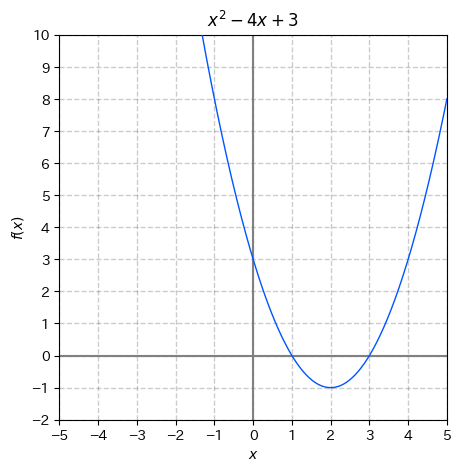

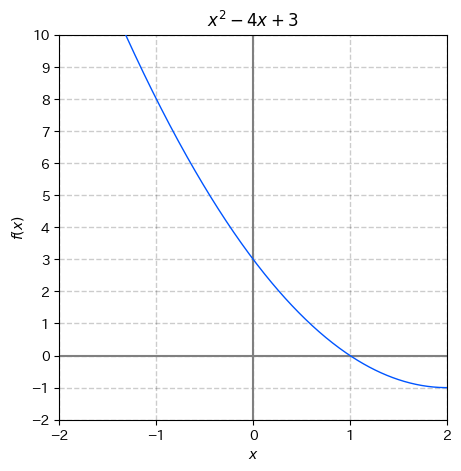

&#8756;&nbsp;&nbsp;「&nbsp; $\displaystyle x < 1 $ &nbsp;」&nbsp;=>&nbsp;「&nbsp; $\displaystyle 0 \leq x^{2} - 4 x + 3 $ &nbsp;」&nbsp;

------ 証明終了 ------

In [4]:
def proof_00_02_01():
    証明 = 証明クラス()
    x = 証明.作成する_変数("x")
    十分条件 = x < 1
    必要条件 = (0 <= x**2 - 4 * x + 3) >> 不等式_v1クラス
    結果 = 十分条件 <= 必要条件
    assert 結果 == True
    # Explain
    証明\
        .追加する_説明(必要条件, 補足="与式", 補足のタイプ="because")\
        .追加する_説明(必要条件 & True, 順接か=True)\
        .追加する_説明(図登録クラス(必要条件.式[1], (((-5, 5), (-2, 10)))))\
        .追加する_説明(図登録クラス(必要条件.式[1], (((-2, 2), (-2, 10)))))\
        .追加する_説明(数理命題クラス(十分条件, 必要条件), 順接か=True)\
        .表示する_説明()


proof_00_02_01()

#### (2)
「$xy+1>x+y$」ならば、　「$|x|<1かつ|y|<1$」である。  

------ 証明開始 ------

 $\displaystyle x + y < x y + 1 $ &nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;与式&nbsp;)

&#8756;&nbsp;&nbsp; $\displaystyle \left(1 - x\right) \left(y - 1\right) < 0 $ &nbsp;

&nbsp; $\displaystyle x + y < x y + 1 $ &nbsp;を図示する。

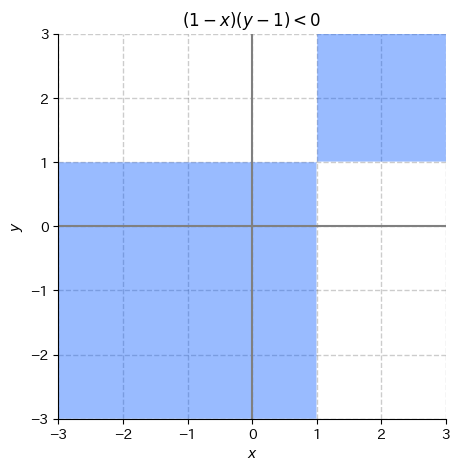

&nbsp; $\displaystyle \left|{x}\right| < 1 \wedge \left|{y}\right| < 1 $ &nbsp;を図示する。

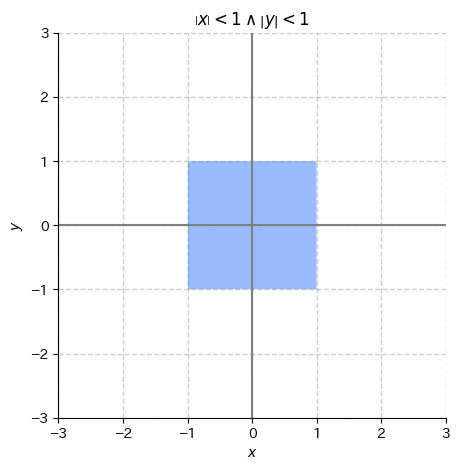

&#8756;&nbsp;&nbsp;「&nbsp; $\displaystyle x + y < x y + 1 $ &nbsp;」&nbsp;=>&nbsp;「&nbsp; $\displaystyle \left|{x}\right| < 1 \wedge \left|{y}\right| < 1 $ &nbsp;」&nbsp;

------ 証明終了 ------

In [5]:
def proof_00_02_02():
    証明 = 証明クラス()
    x, y = 証明.作成する_変数(['x', 'y'])
    # Make sufficient condition
    十分条件 = (x*y+1>x+y) >> 不等式_v2クラス
    十分条件_因数分解後 = 十分条件.因数分解する()
    # Make necessary condition
    不等式_左 = 不等式_v1クラス(証明, 'abs(x)<1')
    不等式_右 = 不等式_v1クラス(証明, 'abs(y)<1')
    必要条件 = 不等式_左 & 不等式_右
    assert isinstance(必要条件, 複合条件_v2クラス)
    # Explain
    証明\
        .追加する_説明(十分条件, 補足='与式')\
        .追加する_説明(十分条件_因数分解後, 順接か=True)\
        .追加する_説明(f"{十分条件}を図示する。")\
        .追加する_説明(図登録クラス( 十分条件_因数分解後,((-3, 3))))\
        .追加する_説明(f"{必要条件}を図示する。")\
        .追加する_説明(図登録クラス( 必要条件,((-3, 3))))\
        .追加する_説明(数理命題クラス(十分条件,必要条件), 順接か=True)\
        .表示する_説明()

proof_00_02_02()

### [03]  
次の命題が真であることを証明せよ。ただし、m, nは自然数とする。

#### (1)
「$n^2$が偶数」ならば、「$n$は偶数」である。  

In [6]:
def proof_00_03_01():
    証明 = 証明クラス()
    偶数か = get_squared_parity(証明, 'odd')
    assert 偶数か == False
    証明\
        .追加する_説明("上記の対偶を考える。")\
        .追加する_説明("「$n$は奇数」ならば、「$n^2$は奇数」である。  ")\
        .挿入する_セクション('get_squared_parity')\
        .表示する_説明()

proof_00_03_01()

------ 証明開始 ------

上記の対偶を考える。

「$n$は奇数」ならば、「$n^2$は奇数」である。  

&emsp;&emsp;------ 2乗の偶奇の判定 ------

&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m + 1$&nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&nbsp;※&nbsp;$\displaystyle m$&nbsp; $ = 整数 $&nbsp;)

&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle \left(2 m + 1\right)^{2}$&nbsp;

&emsp;&emsp;<em style="opacity:0;">&#8756;&nbsp;</em>&nbsp;$\textcolor{gray} {\displaystyle n^{2}}$&nbsp; $=$ &nbsp;$\displaystyle 4 m^{2} + 4 m + 1$&nbsp;

&emsp;&emsp;各係数が$2$で割り切れないので、奇数

<span></span>

------ 証明終了 ------

#### (2)
「$\sqrt{m}$が整数でない」ならば、「$\sqrt{m}$は無理数」である。  

In [7]:
def proof_00_03_02():
    証明 = 証明クラス()
    結果 = 整数クラス.証明する_有理平方根を持つならば整数(証明)
    assert 結果 == True
    証明\
        .追加する_説明('下記、対偶を用いて証明する。')\
        .追加する_説明('「$\sqrt{m}$は有理数」ならば、「$\sqrt{m}$が整数」である。')\
        .挿入する_セクション('証明する_有理平方根を持つならば整数')\
        .追加する_説明(f'よって、{結果}である。')\
        .表示する_説明()


proof_00_03_02()


------ 証明開始 ------

下記、対偶を用いて証明する。

「$\sqrt{m}$は有理数」ならば、「$\sqrt{m}$が整数」である。

&emsp;&emsp;------ 背理法による無理数の証明 ------

&emsp;&emsp;&nbsp;$\displaystyle q$&nbsp;,&nbsp;$\displaystyle l$&nbsp;は互いに素な整数とする・・・①

&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \sqrt{m}$&nbsp; $=$ &nbsp;$\displaystyle \frac{q}{l}$&nbsp;

&emsp;&emsp;$\displaystyle m$&nbsp; $=$ &nbsp;$\displaystyle \frac{q^{2}}{l^{2}}$&nbsp;

&emsp;&emsp;&#8756;&nbsp;&nbsp; &nbsp;$\displaystyle \left[\begin{matrix}l\\\sqrt{m}\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}1\\q\end{matrix}\right]$&nbsp; &nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;①かつmは整数&nbsp;)

&emsp;&emsp;$\displaystyle \sqrt{m}$&nbsp; $ = 整数 $

<span></span>

よって、Trueである。

------ 証明終了 ------

### [04]  

#### (1)
「$\sqrt{2}$が無理数であることを証明せよ。  

In [8]:
def proof_00_04_01():
    証明 = 証明クラス()
    m,q =証明.作成する_変数(['m', 'q'], {'integer':True, 'positive':True})
    _2 = 整数クラス(証明,2)
    _1_2 = 分数クラス(証明,(1,2))
    結果 = 整数クラス.証明する_有理平方根を持つならば整数(証明)
    assert 結果==True
    証明\
        .追加する_説明('背理法で証明する。')\
        .追加する_説明(f'「{_2**(_1_2)}は有理数である」と、仮定する。') \
        .追加する_説明((m==2) >> 定義式クラス, 補足='と置く。', 補足のタイプ='plain')\
        .挿入する_セクション('証明する_有理平方根を持つならば整数')\
        .追加する_説明(q**2==2, 順接か=True)\
        .追加する_説明(f'$2$は整数の$2$乗ではないので、矛盾。')\
        .追加する_説明(f'よって、{_2**(_1_2)}は無理数である。') \
        .表示する_説明()


proof_00_04_01()


------ 証明開始 ------

背理法で証明する。

「&nbsp;$\displaystyle \sqrt{2}$&nbsp;は有理数である」と、仮定する。

$\displaystyle m$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2$&nbsp;&nbsp;&#8230;&#8230;&nbsp;&nbsp;と置く。&nbsp;

&emsp;&emsp;------ 背理法による無理数の証明 ------

&emsp;&emsp;&nbsp;$\displaystyle q$&nbsp;,&nbsp;$\displaystyle l$&nbsp;は互いに素な整数とする・・・①

&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \sqrt{m}$&nbsp; $=$ &nbsp;$\displaystyle \frac{q}{l}$&nbsp;

&emsp;&emsp;$\displaystyle m$&nbsp; $=$ &nbsp;$\displaystyle \frac{q^{2}}{l^{2}}$&nbsp;

&emsp;&emsp;&#8756;&nbsp;&nbsp; &nbsp;$\displaystyle \left[\begin{matrix}l\\\sqrt{m}\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}1\\q\end{matrix}\right]$&nbsp; &nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;①かつmは整数&nbsp;)

&emsp;&emsp;$\displaystyle \sqrt{m}$&nbsp; $ = 整数 $

<span></span>

&#8756;&nbsp;&nbsp;$\displaystyle q^{2}$&nbsp; $=$ &nbsp;$\displaystyle 2$&nbsp;

$2$は整数の$2$乗ではないので、矛盾。

よって、&nbsp;$\displaystyle \sqrt{2}$&nbsp;は無理数である。

------ 証明終了 ------

#### (2)
「素数は無限にある」ことを証明せよ  

In [9]:
def proof_00_04_02():
    証明 = 証明クラス()
    整数クラス.証明する_素数が無限に存在すること(証明)
    証明\
        .挿入する_セクション('証明する_素数が無限に存在すること')\
        .表示する_説明()


proof_00_04_02()

------ 証明開始 ------

&emsp;&emsp;------ 素数が無限にある証明 ------

&emsp;&emsp;素数が有限であると仮定する。

&emsp;&emsp;$\displaystyle k$&nbsp; $ = 整数 $

&emsp;&emsp;$\displaystyle p_{max}$&nbsp; $ = 最大の素数...① $

&emsp;&emsp;$\displaystyle p_{any}$&nbsp; $ = 最大の素数以下の、任意の素数 $

&emsp;&emsp;$\displaystyle k p_{any}$&nbsp; $ = 最大の素数までの、素数の総乗 $

&emsp;&emsp;&emsp;&emsp;------ ユークリッドの互除法 ------

&emsp;&emsp;&emsp;&emsp;$GCD($&nbsp;$\displaystyle k p_{any} + 1$&nbsp;$,$&nbsp;$\displaystyle p_{any}$&nbsp;$)$ &nbsp; $=$ &nbsp;$GCD($&nbsp;$\displaystyle 1$&nbsp;$ , $&nbsp;$\displaystyle p_{any}$&nbsp;$)$

&emsp;&emsp;&emsp;&emsp;$GCD($ &nbsp;$\displaystyle k p_{any} + 1$&nbsp;, &nbsp;$\displaystyle p_{any}$&nbsp;) $=$ &nbsp;$\displaystyle 1$&nbsp;

<span></span>

&emsp;&emsp;よって、①と矛盾する

&emsp;&emsp;よって、素数は無限に存在する。

<span></span>

------ 証明終了 ------

## 第１章  

### [06]  

#### (1)  
5400の正の約数の個数、およびその総和を求めよ。

In [10]:
def proof_01_06_01_01():
    証明 = 証明クラス()
    n = 整数クラス(証明, 5400)
    assert n.約数の個数 ==48
    # Explain
    証明\
        .追加する_説明(f"{n}の正の約数の個数は、{n.約数の個数}")\
        .表示する_説明()


def proof_01_06_01_02():
    証明 = 証明クラス()
    n = 整数クラス(証明, 5400)
    assert n.約数の和 ==18600
    # Explain
    証明\
        .追加する_説明(f"{n}の正の約数の総和は、{n.約数の和}")\
        .表示する_説明()



def proof_01_06_01():
    proof_01_06_01_01()
    proof_01_06_01_02()


proof_01_06_01()


------ 証明開始 ------

&nbsp;$\displaystyle 5400$&nbsp;の正の約数の個数は、&nbsp;$\displaystyle 48$&nbsp;

------ 証明終了 ------

------ 証明開始 ------

&nbsp;$\displaystyle 5400$&nbsp;の正の約数の総和は、&nbsp;$\displaystyle 18600$&nbsp;

------ 証明終了 ------

#### (2)  
2桁の自然数の中で、正の約数がちょうど10個であるものを全て求めよ

In [11]:
def proof_01_06_02(約数の個数: int, range: tuple[int, int]) :
    証明 = 証明クラス()
    n = 証明.作成する_変数('n',{'integer':True, 'positive':True})
    結果 = n.同定する_条件から(10, (10, 99))
    assert 結果 == [48,80] 
    証明.挿入する_セクション('同定する_条件から').表示する_説明()

proof_01_06_02(10, (10, 99)) 


------ 証明開始 ------

&emsp;&emsp;------ 同定する_条件から ------

&emsp;&emsp;求める整数を&nbsp;$\displaystyle n$&nbsp;とする。

&emsp;&emsp;&nbsp;$\displaystyle \left[\begin{matrix}p_{}\\q_{}\\r_{}\\s_{}\\t_{}\end{matrix}\right]$&nbsp;を素数とする。

&emsp;&emsp;約数が$ 10 $個なので、素因数分解して&nbsp;$\displaystyle p_{}^{4} q_{}$&nbsp;となる$2$桁の自然数を求める

&emsp;&emsp;上記を満たすのは、下記の自然数である。

&emsp;&emsp;$\displaystyle n$&nbsp; $=$ &nbsp;$\displaystyle 48$&nbsp;, &nbsp;$\displaystyle 80$&nbsp;

<span></span>

------ 証明終了 ------

### [07]  
次の条件を満たす２つの自然数a,b($a \leq b$)を求めよ

#### (1)
和が117で、最大公約数が13  

In [12]:
def proof_01_07_01():
    証明 = 証明クラス()
    l,k = 証明.作成する_変数s('l k', {'integer':True, 'positive':True})
    ペア = 自然数ペアクラス(証明, (l,k))
    ペア.同定する_条件から(117,最大公約数 = 13, 最小公倍数=None)
    # Explain
    証明.挿入する_セクション('同定する_条件から')\
        .表示する_説明()


proof_01_07_01()


------ 証明開始 ------

&emsp;&emsp;------ 同定する_条件から ------

&emsp;&emsp;&nbsp;$\displaystyle a_{0 }$&nbsp;,&nbsp;$\displaystyle b_{0 }$&nbsp;を求める整数として、下記とおく。

&emsp;&emsp;$\displaystyle a_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle l$&nbsp;

&emsp;&emsp;$\displaystyle b_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle k$&nbsp;

&emsp;&emsp;$\displaystyle a_{0 } + b_{0 }$&nbsp; $=$ &nbsp;$\displaystyle 117$&nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;与式&nbsp;)

&emsp;&emsp;&nbsp;$\displaystyle m_{0 }$&nbsp;,&nbsp;$\displaystyle n_{0 }$&nbsp;を互いに素な自然数とすると、

&emsp;&emsp;$\displaystyle a_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 13 m_{0 }$&nbsp;

&emsp;&emsp;$\displaystyle b_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 13 n_{0 }$&nbsp;

&emsp;&emsp;上記条件を満たすペアは、下記である

&emsp;&emsp; $\displaystyle \left[\begin{matrix}a_{0 }\\b_{0 }\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}13\\104\end{matrix}\right]$&nbsp;, &nbsp;$\displaystyle \left[\begin{matrix}26\\91\end{matrix}\right]$&nbsp;, &nbsp;$\displaystyle \left[\begin{matrix}52\\65\end{matrix}\right]$&nbsp;

<span></span>

------ 証明終了 ------

#### (2)
和が341で、最小公倍数が1650  

In [13]:
def proof_01_07_02():
    証明 = 証明クラス()
    m,n = 証明.作成する_変数s('m,n', {'integer':True, 'positive':True})
    ペア = 自然数ペアクラス(証明, (m,n))
    結果 = ペア.同定する_条件から(341, 最小公倍数=1650)
    # assertion
    正解か:bool|数理的ブールクラス = True
    correct_解s = [(66, 275)]
    for i, ベクトル方程式 in enumerate(結果):
        for j, 方程式 in enumerate(ベクトル方程式):
            a =((方程式.式s[1] == correct_解s[i][j]) == True)
            正解か =  a & 正解か
    assert 正解か
    # Explain
    証明\
        .挿入する_セクション('同定する_条件から')\
        .表示する_説明()


proof_01_07_02()


------ 証明開始 ------

&emsp;&emsp;------ 同定する_条件から ------

&emsp;&emsp;&nbsp;$\displaystyle a_{0 }$&nbsp;,&nbsp;$\displaystyle b_{0 }$&nbsp;を求める整数として、下記とおく。

&emsp;&emsp;$\displaystyle a_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle m$&nbsp;

&emsp;&emsp;$\displaystyle b_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle n$&nbsp;

&emsp;&emsp;$\displaystyle a_{0 } + b_{0 }$&nbsp; $=$ &nbsp;$\displaystyle 341$&nbsp;

&emsp;&emsp;&nbsp;$\displaystyle m_{}$&nbsp;,&nbsp;$\displaystyle n_{}$&nbsp;を互いに素な自然数とする。

&emsp;&emsp;&nbsp;$\displaystyle GCD$&nbsp;, &nbsp;$\displaystyle LCM$&nbsp;を&nbsp;$\displaystyle a_{0 }$&nbsp;,&nbsp;$\displaystyle b_{0 }$&nbsp;の最大公約数/最小公倍数とする。

&emsp;&emsp;$\displaystyle a_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle GCD m_{}$&nbsp;

&emsp;&emsp;$\displaystyle b_{0 }$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle GCD n_{}$&nbsp;

&emsp;&emsp;公約数・公倍数の関係式より

&emsp;&emsp;$\displaystyle GCD \left(m_{} + n_{}\right)$&nbsp; $=$ &nbsp;$\displaystyle 341$&nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;公約数・公倍数の関係式&nbsp;)

&emsp;&emsp;$\displaystyle GCD m_{} n_{}$&nbsp; $=$ &nbsp;$\displaystyle LCM$&nbsp;&nbsp;&#8230;&#8230;&nbsp;(&nbsp;&#x2235;&nbsp;公約数・公倍数の関係式&nbsp;)

&emsp;&emsp;<em style="opacity:0;"></em>$\textcolor{gray} {\displaystyle GCD m_{} n_{}}$&nbsp; $=$ &nbsp;$\displaystyle 1650$&nbsp;

&emsp;&emsp;上記条件を満たすペアは、下記である

&emsp;&emsp; $\displaystyle \left[\begin{matrix}a_{0 }\\b_{0 }\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}66\\275\end{matrix}\right]$&nbsp;

<span></span>

------ 証明終了 ------

### [08]  
自然数mとnが互いに素ならば、$3*m+n$と$7*m+2*n$も互いに素である。

In [14]:
def proof_01_08_01():
    証明 = 証明クラス()
    m,n = 証明.作成する_変数(['m', 'n'], {'integer':True, 'positive':True})
    ペア =自然数ペアクラス(証明, (3*m+n, 7*m+2*n), relational_prime_pairs=[(m,n)])
    結果 = ペア.最大公約数
    assert 結果 == 1
    # Explain
    証明\
        .追加する_説明(ペア.最大公約数の履歴)\
        .追加する_説明('∴ 互いに素である。')\
        .表示する_説明()


proof_01_08_01()


------ 証明開始 ------

&emsp;&emsp;------ ユークリッドの互除法 ------

&emsp;&emsp;$GCD($&nbsp;$\displaystyle 3 m + n$&nbsp;$,$&nbsp;$\displaystyle 7 m + 2 n$&nbsp;$)$ &nbsp; $=$ &nbsp;$GCD($&nbsp;$\displaystyle 3 m + n$&nbsp;$ , $&nbsp;$\displaystyle m$&nbsp;$)$

&emsp;&emsp;$GCD($&nbsp;$\displaystyle 3 m + n$&nbsp;$,$&nbsp;$\displaystyle 7 m + 2 n$&nbsp;$)$ &nbsp; $=$ &nbsp;$GCD($&nbsp;$\displaystyle n$&nbsp;$ , $&nbsp;$\displaystyle m$&nbsp;$)$

&emsp;&emsp;$GCD($ &nbsp;$\displaystyle 3 m + n$&nbsp;, &nbsp;$\displaystyle 7 m + 2 n$&nbsp;) $=$ &nbsp;$\displaystyle 1$&nbsp;

<span></span>

∴ 互いに素である。

------ 証明終了 ------

### [9]  
nを自然数とするとき、$m \leq n$でmとnの最大公約数が１となる自然数mの個数を$f(x)$とする。

#### (1)
$f(15)$を求めよ  

------ 証明開始 ------

&emsp;&emsp;------ オイラー関数の証明 ------

&emsp;&emsp;$ET(n)$ := オイラー関数(ただし、$n$は自然数)

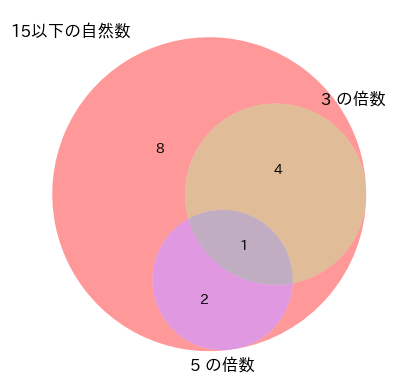

&emsp;&emsp;上図より、

&emsp;&emsp;$ET(15) = $ 8

<span></span>

------ 証明終了 ------

In [15]:
class ベン図(TypedDict):
    label: str
    set: set[int]


class VennData(TypedDict):
    label: str
    set: set[int] | set[str]


def オイラー関数_v0(証明: 証明クラス, integer: int, セクションタイトル: str='オイラー関数') -> int:
    素因数s = 整数クラス(証明, integer).素因数分解する()
    assert len(素因数s) <= 2,\
        '    素因数が３以上には対応していません。\n    素因数：{}'.format(
        list(素因数s.keys()))
    multiples: dict[int, set[int]] = {}
    all_element: set[int] = set(range(1, integer+1))
    relative_primes_candidate: set[int] = set(range(1, integer+1))
    for i, prime in enumerate(素因数s):
        multiples[prime] = set()
        for j in range(1, integer+1):
            if (j % prime == 0):
                multiples[prime].add(j)
                if j in relative_primes_candidate:
                    relative_primes_candidate.remove(j)
    relative_primes = relative_primes_candidate
    結果 = len(relative_primes)
    # Explain
    セクション = 証明.作成する_セクション('オイラー関数の証明', セクションタイトル)
    セクション.追加する('$ET(n)$ := オイラー関数(ただし、$n$は自然数)')
    ベン図data: list[VennData] = [{
        'label':  '{}以下の自然数'.format(integer),
        'set': all_element
    }]
    for key, 値 in multiples.items():
        ベン図data.append(
            {
                'label': '{} の倍数'.format(key),
                'set': 値
            }
        )
    セクション.追加する(ベン図登録クラス(ベン図data))
    セクション.追加する('上図より、')
    セクション.追加する(f'$ET({integer}) = $ {結果}')
    return 結果


def proof_01_09_01():
    証明 = 証明クラス()
    結果 = オイラー関数_v0(証明, 15, 'オイラー関数')
    assert 結果 == 8
    # Explain
    証明\
        .挿入する_セクション('オイラー関数')\
        .表示する_説明()


proof_01_09_01()


#### (2)
$p, q$を互いに異なる素数とする。このとき$f(pq)$を求めよ  

------ 証明開始 ------

&emsp;&emsp;------ オイラー関数の証明 ------

&emsp;&emsp;$ET(n)$ :=オイラー関数 （nは自然数）

&emsp;&emsp;&nbsp;$\displaystyle p$&nbsp;,&nbsp;$\displaystyle q$&nbsp;は互いに異なる素数なので、

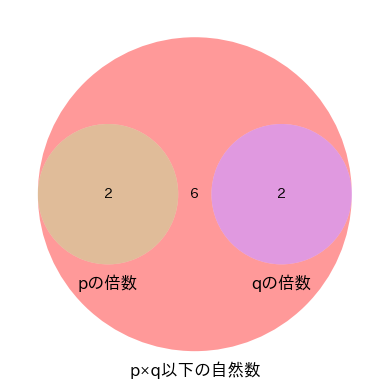

&emsp;&emsp;上図より（数字に意味はない）、

&emsp;&emsp;$ET($&nbsp;$\displaystyle p$&nbsp;&nbsp;$\displaystyle q$&nbsp;$) = $&nbsp;$\displaystyle p + q$&nbsp;

<span></span>

------ 証明終了 ------

In [16]:
def オイラー関数_d1_v2(証明: 証明クラス, prime_symbols: tuple[str, str], セクションタイトル: str='オイラー関数') -> str:
    p, q = 証明.作成する_変数(list(prime_symbols))
    # p = 式クラス(証明, primeSymbols[0])
    # q = 式クラス(証明, primeSymbols[1])
    結果 = p+q
    # Explain
    セクション = 証明.作成する_セクション('オイラー関数の証明', セクションタイトル)
    セクション\
        .追加する(f'$ET(n)$ :=オイラー関数 （nは自然数）')\
        .追加する(f'{p},{q}は互いに異なる素数なので、')
    ベン図data: list[VennData] = [
        {
            'label': f'{p.テキスト}×{q.テキスト}以下の自然数',
            'set': {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
        },
        {
            'label': f'{p.テキスト}の倍数',
            'set': {1, 2}
        },
        {
            'label': f'{q.テキスト}の倍数',
            'set': {3, 4}
        }
    ]
    セクション\
        .追加する(ベン図登録クラス(ベン図data))\
        .追加する('上図より（数字に意味はない）、')\
        .追加する(f'$ET(${p}{q}$) = ${結果}')
    return 結果.テキスト


def proof_01_09_02():
    証明 = 証明クラス()
    結果 = オイラー関数_d1_v2(証明, ('p', 'q'))
    assert 結果 == 'p + q'
    # Explain
    証明\
        .挿入する_セクション('オイラー関数')\
        .表示する_説明()


proof_01_09_02()


### [10]  

#### (1)
$589と703の最大公約数を求めよ$  

In [17]:
def proof_01_10_01():
    証明 = 証明クラス()
    ペア = 自然数ペアクラス(証明, (589, 703))
    assert ペア.最大公約数 == 19
    # Explain
    証明.追加する_説明(ペア.最大公約数の履歴).追加する_説明(f"よって、{ペア.最大公約数}").表示する_説明()


proof_01_10_01()

------ 証明開始 ------

&emsp;&emsp;------ ユークリッドの互除法 ------

&emsp;&emsp;$ GCD($ &nbsp;$\displaystyle 589$&nbsp;, &nbsp;$\displaystyle 703$&nbsp;) $=$ $GCD($ &nbsp;$\displaystyle 589$&nbsp; , &nbsp;$\displaystyle 114$&nbsp; )

&emsp;&emsp;$ GCD($ &nbsp;$\displaystyle 589$&nbsp;, &nbsp;$\displaystyle 703$&nbsp;) $=$ $GCD($ &nbsp;$\displaystyle 19$&nbsp; , &nbsp;$\displaystyle 114$&nbsp; )

&emsp;&emsp;$ GCD($ &nbsp;$\displaystyle 589$&nbsp;, &nbsp;$\displaystyle 703$&nbsp;) $=$ $GCD($ &nbsp;$\displaystyle 19$&nbsp; , &nbsp;$\displaystyle 19$&nbsp; )

&emsp;&emsp;$GCD($ &nbsp;$\displaystyle 589$&nbsp;, &nbsp;$\displaystyle 703$&nbsp;) $=$ &nbsp;$\displaystyle 19$&nbsp;

<span></span>

よって、&nbsp;$\displaystyle 19$&nbsp;

------ 証明終了 ------

### (2)
#### m,nが互いに素な自然数であるとき、$\displaystyle \frac{4m+9n}{3m+7n}$は既約分数であることを示せ。  

In [18]:
def proof_01_10_02():
    証明 = 証明クラス()
    m,n = 証明.作成する_変数(['m', 'n'], {'integer':True, 'positive':True})
    ペア = 自然数ペアクラス(証明, (4*m+9*n, 3*m+7*n), relational_prime_pairs=[(m,n)])
    assert ペア.最大公約数 ==1
    # Explain
    証明\
        .追加する_説明('「既約分数でない」ならば、「1より大きい最小公倍数を持つ」')\
        .追加する_説明(ペア.最大公約数の履歴)\
        .追加する_説明('よって、既約分数である。')\
        .表示する_説明()


proof_01_10_02()

------ 証明開始 ------

「既約分数でない」ならば、「1より大きい最小公倍数を持つ」

&emsp;&emsp;------ ユークリッドの互除法 ------

&emsp;&emsp;$GCD($&nbsp;$\displaystyle 4 m + 9 n$&nbsp;$,$&nbsp;$\displaystyle 3 m + 7 n$&nbsp;$)$ &nbsp; $=$ &nbsp;$GCD($&nbsp;$\displaystyle m + 2 n$&nbsp;$ , $&nbsp;$\displaystyle 3 m + 7 n$&nbsp;$)$

&emsp;&emsp;$GCD($&nbsp;$\displaystyle 4 m + 9 n$&nbsp;$,$&nbsp;$\displaystyle 3 m + 7 n$&nbsp;$)$ &nbsp; $=$ &nbsp;$GCD($&nbsp;$\displaystyle m + 2 n$&nbsp;$ , $&nbsp;$\displaystyle n$&nbsp;$)$

&emsp;&emsp;$GCD($&nbsp;$\displaystyle 4 m + 9 n$&nbsp;$,$&nbsp;$\displaystyle 3 m + 7 n$&nbsp;$)$ &nbsp; $=$ &nbsp;$GCD($&nbsp;$\displaystyle m$&nbsp;$ , $&nbsp;$\displaystyle n$&nbsp;$)$

&emsp;&emsp;$GCD($ &nbsp;$\displaystyle 4 m + 9 n$&nbsp;, &nbsp;$\displaystyle 3 m + 7 n$&nbsp;) $=$ &nbsp;$\displaystyle 1$&nbsp;

<span></span>

よって、既約分数である。

------ 証明終了 ------

### [11]  
$2010! = 2^nm（mは奇数）のとき、自然数nを求めよ。$

In [19]:
def 取得する_階乗の素数の乗数(証明: 証明クラス, factorial: int, prime: int, セクションタイトル: str = '取得する_階乗の素数の乗数') -> int:
    結果 = 0
    power = 1
    should_continue: bool = True
    while (should_continue):
        結果_tmp = factorial//(prime**power)
        結果 += 結果_tmp
        power += 1
        if (結果_tmp < 1):
            should_continue = False
    # Make テーブル
    tableData: dict[str, list[str | int | float]] = {
        '自然数': list(range(1, factorial+1))
    }
    テーブル = テーブルクラス(tableData)
    for power in range(1, 10):
        テーブル.追加する_列('{}の倍数'.format(
            2**power), ((['']*(2**power-1)+['○'])*factorial + ['']*factorial)[:2010])
    テーブル.追加する_列('...', ['']*2010)
    # Explain
    セクション = 証明.作成する_セクション('階乗の素数の乗数の算出', セクションタイトル)\
        .追加する(f'{factorial}までの自然数は、2の何乗まで約数に含むかを、表にまとめる')
    セクション.追加する(テーブル)
    return 結果


def proof_01_11_01():
    証明 = 証明クラス()
    結果 = 取得する_階乗の素数の乗数(
        証明, 2010, 2, )
    assert 結果 == 2002
    # Explain
    n = 証明.作成する_変数('n_')
    証明\
        .追加する_説明('$2010!$を素因数分解した際の、2の乗数を求めることと同義である。')\
        .挿入する_セクション('取得する_階乗の素数の乗数')\
        .追加する_説明(n == 結果, 順接か=True)\
        .表示する_説明()


proof_01_11_01()


------ 証明開始 ------

$2010!$を素因数分解した際の、2の乗数を求めることと同義である。

&emsp;&emsp;------ 階乗の素数の乗数の算出 ------

&emsp;&emsp;2010までの自然数は、2の何乗まで約数に含むかを、表にまとめる

,自然数,2の倍数,4の倍数,8の倍数,16の倍数,32の倍数,64の倍数,128の倍数,256の倍数,512の倍数,...
0,1,,,,,,,,,,
1,2,○,,,,,,,,,
2,3,,,,,,,,,,
3,4,○,○,,,,,,,,
4,5,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,○,,,,,,,,,
2006,2007,,,,,,,,,,
2007,2008,○,○,○,,,,,,,
2008,2009,,,,,,,,,,


<span></span>

&#8756;&nbsp;&nbsp;$\displaystyle n_{}$&nbsp; $=$ &nbsp;$\displaystyle 2002$&nbsp;

------ 証明終了 ------

## 第2章  

### [12] 余りで分類 
$l,m,nは自然数とする。$

#### (1)
$n^2を3で割った余りは、0または1であることを示せ。$

In [20]:
def proof_02_12_01():
    証明 = 証明クラス()
    n = 証明.作成する_変数('n', {'integer':True, 'positive':True})
    結果 = (n**2).チェックする_特定の倍数か(3, [0, 1])
    assert 結果 == True
    # Explain
    証明.挿入する_セクション('チェックする_特定の倍数か')
    if 結果:
        証明.追加する_説明('よって、証明された。')
    証明.表示する_説明()

proof_02_12_01()


------ 証明開始 ------

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$3$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0} - 2$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 9 m_{0}^{2} - 12 m_{0} + 4$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、剰余は$1$である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 9 m_{0}^{2} - 6 m_{0} + 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、剰余は$1$である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0}$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 9 m_{0}^{2}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$3$の倍数である

<span></span>

よって、証明された。

------ 証明終了 ------

#### (2)
$l^2+m^2が3の倍数のとき、l,mが共に３の倍数であることを示せ。$

#### 対偶をとって、以下を証明する。  
#### 「l,mのいずれかが3の倍数でない」ならば、「$l^2+m^2$が3の倍数」ではない  

#### 式の対称性より、lを３の倍数でないとする。
#### (1)より、$mod(l^2,3)=1$
#### $mod(m^2,3)=$　0 or 1
#### $mod(l^2+m^2,3) = 0$

### [13] 素数になる、ならない 
$2以上の自然数nに対して、nとn^2+2がともに素数になるのは、n=3の場合に限ることを証明せよ。$

In [21]:
def proof_02_13_01():
    証明 = 証明クラス()
    m, n = 証明.作成する_変数(['m','n'],{'integer':True, 'positive':True})
    N2 = 式クラス(証明, '2')
    N3 = 式クラス(証明, '3')
    N_3times = 3*m
    式 = n**2+2
    結果 = 式.チェックする_特定の倍数か(
        3, [0], {'times': 3, 'mod': [1, 2]})
    assert 結果 == True
    # Explain
    セクション_1 = 証明\
        .作成する_セクション(f'{(n==N2) >> 定義式クラス}のとき', 'case_1')\
        .追加する(式 == 式.代入する((n==N2) >> 方程式クラス))\
        .追加する('よって、素数ではない')
    セクション_2 = 証明\
        .作成する_セクション(f'{(n==N3) >> 定義式クラス}のとき', 'case_2')\
        .追加する(式 == 式.代入する((n==N3) >> 方程式クラス))\
        .追加する('よって、素数。')
    セクション_3 = 証明\
        .作成する_セクション(f'{(n==N_3times) >> 定義式クラス}のとき', 'case_3')\
        .追加する(n=='3の倍数')\
        .追加する('よって、素数ではない')\

    証明\
        .追加する_説明(f'{n}を[$2, 3, 3$の倍数、$3$の倍数でない]で場合分けする。')\
        .追加する_説明(f'{m}を自然数とする。')\
        .挿入する_セクション(セクション_1)\
        .挿入する_セクション(セクション_2)\
        .挿入する_セクション(セクション_3)\
        .挿入する_セクション('チェックする_特定の倍数か')
    if 結果:
        証明.追加する_説明('よって、証明された。')
    証明.表示する_説明()


proof_02_13_01()


------ 証明開始 ------

&nbsp;$\displaystyle n$&nbsp;を[$2, 3, 3$の倍数、$3$の倍数でない]で場合分けする。

&nbsp;$\displaystyle m$&nbsp;を自然数とする。

&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2$&nbsp;のとき ------

&emsp;&emsp;$\displaystyle n^{2} + 2$&nbsp; $=$ &nbsp;$\displaystyle 6$&nbsp;

&emsp;&emsp;よって、素数ではない

<span></span>

&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3$&nbsp;のとき ------

&emsp;&emsp;$\displaystyle n^{2} + 2$&nbsp; $=$ &nbsp;$\displaystyle 11$&nbsp;

&emsp;&emsp;よって、素数。

<span></span>

&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m$&nbsp;のとき ------

&emsp;&emsp;$\displaystyle n$&nbsp; $ = 3の倍数 $

&emsp;&emsp;よって、素数ではない

<span></span>

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$3$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0} - 2$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} + 2$&nbsp; $=$ &nbsp;$\displaystyle 9 m_{0}^{2} - 12 m_{0} + 6$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{2} + 2\right) \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$3$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} + 2$&nbsp; $=$ &nbsp;$\displaystyle 9 m_{0}^{2} - 6 m_{0} + 3$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{2} + 2\right) \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$3$の倍数である

<span></span>

よって、証明された。

------ 証明終了 ------

### [14] 倍数の証明 
$nを奇数とすると、次の問いに答えよ。$

#### (1)
$n^2-1は８の倍数であることを証明せよ。$  

In [22]:
def proof_02_14_01():
    証明 = 証明クラス()
    n = 証明.作成する_変数('n', {'integer':True})
    結果 = (n**2-1).チェックする_特定の倍数か(
        8, [0],{'times': 2, 'mod': [1]})
    assert 結果 == True
    # Explain
    証明.挿入する_セクション('チェックする_特定の倍数か')
    if 結果:
        証明.追加する_説明('よって、証明された。')

    証明.表示する_説明()


proof_02_14_01()


------ 証明開始 ------

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$8$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 8 m_{0} - 3$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} - 1$&nbsp; $=$ &nbsp;$\displaystyle 64 m_{0}^{2} - 48 m_{0} + 8$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{2} + 7\right) \bmod 8$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$8$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 8 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} - 1$&nbsp; $=$ &nbsp;$\displaystyle 64 m_{0}^{2} - 16 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{2} + 7\right) \bmod 8$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$8$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 8 m_{0} + 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} - 1$&nbsp; $=$ &nbsp;$\displaystyle 64 m_{0}^{2} + 16 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{2} + 7\right) \bmod 8$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$8$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 8 m_{0} + 3$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} - 1$&nbsp; $=$ &nbsp;$\displaystyle 64 m_{0}^{2} + 48 m_{0} + 8$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{2} + 7\right) \bmod 8$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$8$の倍数である

<span></span>

よって、証明された。

------ 証明終了 ------

#### (2)
$n^5-nは3の倍数であることを証明せよ。$  

In [23]:
def proof_02_14_02():
    証明 = 証明クラス()
    n = 証明.作成する_変数('n', {'integer':True})
    結果 = (n**5-n).チェックする_特定の倍数か(
        3, [0],{'times': 2, 'mod': [1]})
    assert 結果 == True
    # Explain
    証明.挿入する_セクション("チェックする_特定の倍数か")
    if 結果:
        証明.追加する_説明('よって、証明された。')
    証明.表示する_説明()


proof_02_14_02()

------ 証明開始 ------

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$3$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0} - 2$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 243 m_{0}^{5} - 810 m_{0}^{4} + 1080 m_{0}^{3} - 720 m_{0}^{2} + 237 m_{0} - 30$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$3$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 243 m_{0}^{5} - 405 m_{0}^{4} + 270 m_{0}^{3} - 90 m_{0}^{2} + 12 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$3$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 3 m_{0}$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 243 m_{0}^{5} - 3 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 3$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$3$の倍数である

<span></span>

よって、証明された。

------ 証明終了 ------

#### (3)
$n^5-1は3の倍数であることを証明せよ。$  

$ (1),(2)より、n^5-1は、3の倍数、かつ８の倍数なので、あとは５の倍数であることを証明すれば良い。 $  

In [24]:
def proof_02_14_03():
    証明 = 証明クラス()
    式 = 式クラス(証明, 'n**5-n')
    結果 = 式.チェックする_特定の倍数か(
        5, [0],{'times': 2, 'mod': [1]})
    assert 結果 == True
    # Explain
    証明.挿入する_セクション('チェックする_特定の倍数か')
    if 結果:
        証明.追加する_説明('よって、証明された。')

    証明.表示する_説明()


proof_02_14_03()

------ 証明開始 ------

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$5$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 5 m_{0} - 3$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 3125 m_{0}^{5} - 9375 m_{0}^{4} + 11250 m_{0}^{3} - 6750 m_{0}^{2} + 2020 m_{0} - 240$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 5$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$5$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 5 m_{0} - 2$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 3125 m_{0}^{5} - 6250 m_{0}^{4} + 5000 m_{0}^{3} - 2000 m_{0}^{2} + 395 m_{0} - 30$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 5$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$5$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 5 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 3125 m_{0}^{5} - 3125 m_{0}^{4} + 1250 m_{0}^{3} - 250 m_{0}^{2} + 20 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 5$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$5$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 5 m_{0}$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 3125 m_{0}^{5} - 5 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 5$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$5$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 5 m_{0} + 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{5} - n$&nbsp; $=$ &nbsp;$\displaystyle 3125 m_{0}^{5} + 3125 m_{0}^{4} + 1250 m_{0}^{3} + 250 m_{0}^{2} + 20 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(n^{5} - n\right) \bmod 5$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$5$の倍数である

<span></span>

よって、証明された。

------ 証明終了 ------

### [15] ピタゴラス数 
$自然数の組(x,y,z)が等式x^2+y^2=z^2を満たすとする。$

#### (1)
全ての自然数$n$について、$n^2$を$4$で割った余りは$0$か$1$もいずれかであることを示せ。

In [25]:
def proof_02_15_01():
    証明 = 証明クラス()
    式 = 式クラス(証明, 'n**2')
    結果 = 式.チェックする_特定の倍数か(
        4, [0,1],{'times': 0, 'mod': []},)
    # Explain
    証明.挿入する_セクション('チェックする_特定の倍数か')
    if 結果:
        証明.追加する_説明('よって、証明された。')
    証明.表示する_説明()


proof_02_15_01()

------ 証明開始 ------

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$4$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 4 m_{0} - 2$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 16 m_{0}^{2} - 16 m_{0} + 4$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 4$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$4$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 4 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 16 m_{0}^{2} - 8 m_{0} + 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 4$&nbsp; $=$ &nbsp;$\displaystyle 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、剰余は$1$である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 4 m_{0}$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 16 m_{0}^{2}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 4$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$4$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle n$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 4 m_{0} + 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2}$&nbsp; $=$ &nbsp;$\displaystyle 16 m_{0}^{2} + 8 m_{0} + 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle n^{2} \bmod 4$&nbsp; $=$ &nbsp;$\displaystyle 1$&nbsp;

&emsp;&emsp;&emsp;&emsp;よって、剰余は$1$である

<span></span>

よって、証明された。

------ 証明終了 ------

#### (2)
$xとyの少なくとも一方が偶数であることを示せ。$

#### $x$,$y$ともに奇数と仮定する。
#### (1)と仮定より、$x^2+y^2$を4で割った余りは、2である。
#### 同様に、(1)より$z^2$を4で割った余りは、0,1のいずれかである。
#### よって矛盾。
#### $x$,$y$のいずれかが、偶数である。

#### (3)
$xが偶数、yが奇数であるとする。このとき、xが4の倍数であることを示せ。$

In [26]:
def proof_02_15_03():
    証明 = 証明クラス()
    a,b,c, x, y,z = 証明.作成する_変数(['a','b','c', 'x','y','z'], {'integer':True})
    X_2 = 4*a
    Y = 2*b+1
    Z= 2*c+1
    与式 = (X_2 == (Z**2-Y**2)) >> 方程式クラス
    aについて解いた式 = 与式.解く('a')[0].因数分解する()
    結果 = aについて解いた式.チェックする_特定の倍数か(2, [0])
    assert 結果 == True
    # Explain
    証明\
        .追加する_説明(f'条件より、{x},{y},{z}を下記で書き換える。（{a},{b},{c}は自然数）')\
        .追加する_説明(x**2 == X_2)\
        .追加する_説明(y == Y)\
        .追加する_説明(z == Z)\
        .追加する_説明('上記を用い、問題文の式を書き換えると、')\
        .追加する_説明(与式)\
        .追加する_説明(a == aについて解いた式)\
        .追加する_説明('「右辺が２の倍数」であると証明する')\
        .挿入する_セクション('チェックする_特定の倍数か')\
        .追加する_説明(f'よって、{x**2}は下記となる')\
        .追加する_説明(x**2 == 8*a)\
        .追加する_説明(f'よって、{x}は4の倍数')\
        .表示する_説明()


proof_02_15_03()

------ 証明開始 ------

条件より、&nbsp;$\displaystyle x$&nbsp;,&nbsp;$\displaystyle y$&nbsp;,&nbsp;$\displaystyle z$&nbsp;を下記で書き換える。（&nbsp;$\displaystyle a$&nbsp;,&nbsp;$\displaystyle b$&nbsp;,&nbsp;$\displaystyle c$&nbsp;は自然数）

$\displaystyle x^{2}$&nbsp; $=$ &nbsp;$\displaystyle 4 a$&nbsp;

$\displaystyle y$&nbsp; $=$ &nbsp;$\displaystyle 2 b + 1$&nbsp;

$\displaystyle z$&nbsp; $=$ &nbsp;$\displaystyle 2 c + 1$&nbsp;

上記を用い、問題文の式を書き換えると、

$\displaystyle 4 a$&nbsp; $=$ &nbsp;$\displaystyle - \left(2 b + 1\right)^{2} + \left(2 c + 1\right)^{2}$&nbsp;

$\displaystyle a$&nbsp; $=$ &nbsp;$\displaystyle \left(- b + c\right) \left(b + c + 1\right)$&nbsp;

「右辺が２の倍数」であると証明する

&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;各変数を$2$で割った余りで、場合分けする。

&emsp;&emsp; $m_0$ , $m_1$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle b$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{0} - 1$&nbsp;,&nbsp;$\displaystyle c$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{1} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(- b + c\right) \left(b + c + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle - 4 m_{0}^{2} + 2 m_{0} + 4 m_{1}^{2} - 2 m_{1}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp; $\displaystyle True $ &nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$2$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle b$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{0} - 1$&nbsp;,&nbsp;$\displaystyle c$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{1}$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(- b + c\right) \left(b + c + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle - 4 m_{0}^{2} + 2 m_{0} + 4 m_{1}^{2} + 2 m_{1}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp; $\displaystyle True $ &nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$2$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle b$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{0}$&nbsp;,&nbsp;$\displaystyle c$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{1} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(- b + c\right) \left(b + c + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle - 4 m_{0}^{2} - 2 m_{0} + 4 m_{1}^{2} - 2 m_{1}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp; $\displaystyle True $ &nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$2$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle b$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{0}$&nbsp;,&nbsp;$\displaystyle c$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 2 m_{1}$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle \left(- b + c\right) \left(b + c + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle - 4 m_{0}^{2} - 2 m_{0} + 4 m_{1}^{2} + 2 m_{1}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp; $\displaystyle True $ &nbsp;

&emsp;&emsp;&emsp;&emsp;よって、$2$の倍数である

<span></span>

よって、&nbsp;$\displaystyle x^{2}$&nbsp;は下記となる

$\displaystyle x^{2}$&nbsp; $=$ &nbsp;$\displaystyle 8 a$&nbsp;

よって、&nbsp;$\displaystyle x$&nbsp;は4の倍数

------ 証明終了 ------

### [16] ピタゴラス数 
$m,n(m<n)$を自然数として、  
$$a=n^2-m^2,  b=2mn,c=n^2+m^2$$
とおく。  
３辺の長さが、$a,b,c$である三角形の内接円の半径を$r$とし、その三角形の面積を$S$とする。  
このとき、以下の問いに答えよ。

#### (1)
$a^2+b^2=c^2$を示せ

In [27]:
def proof_02_16_01():
    証明 = 証明クラス()
    m,n = 証明.作成する_変数s('m,n', {'positive':True, 'integer':True})
    a,b,c= 証明.作成する_変数s('a,b,c')
    A = n**2-m**2
    B = 2*m*n
    C = n**2+m**2
    方程式 = A**2+B**2 == C**2
    assert 方程式 == True
    # Explain
    証明\
        .追加する_説明(a**2+b**2 == (A**2+B**2).展開する())\
        .追加する_説明(a**2+b**2 ==(A**2+B**2).因数分解する())\
        .追加する_説明(a**2+b**2==c**2)\
        .表示する_説明()

proof_02_16_01()

------ 証明開始 ------

$\displaystyle a^{2} + b^{2}$&nbsp; $=$ &nbsp;$\displaystyle m^{4} + 2 m^{2} n^{2} + n^{4}$&nbsp;

<em style="opacity:0;"></em>$\textcolor{gray} {\displaystyle a^{2} + b^{2}}$&nbsp; $=$ &nbsp;$\displaystyle \left(m^{2} + n^{2}\right)^{2}$&nbsp;

<em style="opacity:0;"></em>$\textcolor{gray} {\displaystyle a^{2} + b^{2}}$&nbsp; $=$ &nbsp;$\displaystyle c^{2}$&nbsp;

------ 証明終了 ------

### (2)
$r$を$m,n$を用いて表せ

In [28]:
def proof_02_16_02():
    証明 = 証明クラス()
    # 変数定義
    m,n = 証明.作成する_変数s('m,n', {'positive':True, 'integer':True})
    a,b,c= 証明.作成する_変数s('a,b,c' )
    A = n**2-m**2
    B = 2*m*n
    C = n**2+m**2
    r = 証明.作成する_変数('r')
    # 証明
    方程式 = (C == (A-r)+(B-r)) >> 方程式クラス
    R = 方程式.解く('r')[0]
    assert R == m*(-m + n)
    # Explain
    証明.追加する_説明(c == (a-r)+(b-r))\
        .追加する_説明(C == (A-r)+(B-r), 順接か=True)\
        .追加する_説明(r==R, 順接か=True)\
        .表示する_説明()



proof_02_16_02()

------ 証明開始 ------

$\displaystyle c$&nbsp; $=$ &nbsp;$\displaystyle a + b - 2 r$&nbsp;

&#8756;&nbsp;&nbsp;$\displaystyle m^{2} + n^{2}$&nbsp; $=$ &nbsp;$\displaystyle - m^{2} + 2 m n + n^{2} - 2 r$&nbsp;

&#8756;&nbsp;&nbsp;$\displaystyle r$&nbsp; $=$ &nbsp;$\displaystyle m \left(- m + n\right)$&nbsp;

------ 証明終了 ------

### (3)
#### $r$が素数のときに、$S$を$r$を用いて表せ

In [30]:
def proof_02_16_03():
    証明 = 証明クラス()
    # 変数定義
    m,n = 証明.作成する_変数s('m,n', {'positive':True, 'integer':True})
    a,b,c= 証明.作成する_変数s('a,b,c' )
    A = n**2-m**2
    B = 2*m*n
    C = n**2+m**2
    r = 証明.作成する_変数('r')
    s = 証明.作成する_変数('s')
    S = (A+B+C)*r/2
    # (m, n-m) = (r, 1)の場合
    S_1 = S.代入する({'n':'1+m'}).代入する({ 'm':'r'}).因数分解する()
    # (m, n-m) = (1, r)の場合
    S_2 = S.代入する({'n':'r+m'}).代入する({ 'm':1}).因数分解する()
    assert (S_1 ==r*(r + 1)*(2*r + 1)) >> 数理的ブールクラス
    assert (S_2 ==r*(r + 1)*(r + 2)) >> 数理的ブールクラス
    # Explain
    解_1 =  ベクトル方程式クラス(証明, [
                (m==r) >> 方程式クラス,
                (n-m==1) >> 方程式クラス,
            ])
    解_2 =  ベクトル方程式クラス(証明, [
                (m==1) >> 方程式クラス,
                (n-m==r) >> 方程式クラス,
            ])
    解ず =  ベクトル解sクラス(証明, [解_1, 解_2])
    # セクションを作成
    セクション_1 = 証明.作成する_セクション(f'{解_1}のとき', 'case_1')\
        .追加する(s==S_1)
    セクション_2 = 証明.作成する_セクション(f'{解_2}のとき','case_2')\
        .追加する(s==S_2)
    証明.追加する_説明((r == m*(n-m)) >> 方程式クラス)\
        .追加する_説明(f'{r}は素数なので、')\
        .追加する_説明(解ず)\
        .挿入する_セクション(セクション_1)\
        .挿入する_セクション(セクション_2)\
        .表示する_説明()

proof_02_16_03()

------ 証明開始 ------

$\displaystyle r$&nbsp; $=$ &nbsp;$\displaystyle m \left(- m + n\right)$&nbsp;

&nbsp;$\displaystyle r$&nbsp;は素数なので、

 $\displaystyle \left[\begin{matrix}m\\- m + n\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}r\\1\end{matrix}\right]$&nbsp;, &nbsp;$\displaystyle \left[\begin{matrix}1\\r\end{matrix}\right]$&nbsp;

&emsp;&emsp;------ &nbsp; &nbsp;$\displaystyle \left[\begin{matrix}m\\- m + n\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}r\\1\end{matrix}\right]$&nbsp; &nbsp;のとき ------

&emsp;&emsp;$\displaystyle s$&nbsp; $=$ &nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right)$&nbsp;

<span></span>

&emsp;&emsp;------ &nbsp; &nbsp;$\displaystyle \left[\begin{matrix}m\\- m + n\end{matrix}\right]$&nbsp; $=$ &nbsp;$\displaystyle \left[\begin{matrix}1\\r\end{matrix}\right]$&nbsp; &nbsp;のとき ------

&emsp;&emsp;$\displaystyle s$&nbsp; $=$ &nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right)$&nbsp;

<span></span>

------ 証明終了 ------

### (4)
#### $r$が素数のときに、$S$が6で割り切れることを示せ

In [31]:
def proof_02_16_04():
    証明 = 証明クラス()
    r = 証明.作成する_変数('r', {'integer':True, 'positive':True})
    s = 証明.作成する_変数('s')
    # (m, n-m) = (r, 1)の場合
    S_1 = r*(r+1)*(2*r+1)
    結果_S_1 = S_1.チェックする_特定の倍数か(
        6, 
        [0], 
        {'times': 2, 'mod': [1]}, 
        セクションタイトル='チェックする_特定の倍数か_s1'
    )
    # (m, n-m) = (1, r)の場合
    S_2 = r*(r+1)*(r+2)
    結果_S_2 = S_2.チェックする_特定の倍数か(
        6, [0], {'times': 2, 'mod': [1]}, セクションタイトル='チェックする_特定の倍数か_s2')
    assert 結果_S_1 & 結果_S_2 == True
    # Explain
    # セクションを作成
    セクション_1 = 証明\
        .作成する_セクション(f' {s==S_1}のとき ', 'case_1')\
        .挿入する_セクション('チェックする_特定の倍数か_s1')
    セクション_2 = 証明\
        .作成する_セクション(f' {s==S_2}のとき ', 'case_2')\
        .挿入する_セクション('チェックする_特定の倍数か_s2')

    証明.挿入する_セクション(セクション_1)
    証明.挿入する_セクション(セクション_2)
    証明.表示する_説明()


proof_02_16_04()


------ 証明開始 ------

&emsp;&emsp;------  &nbsp;$\displaystyle s$&nbsp; $=$ &nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right)$&nbsp;のとき  ------

&emsp;&emsp;&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;&emsp;&emsp;各変数を$6$で割った余りで、場合分けする。

&emsp;&emsp;&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle r$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 6 m_{0} - 3$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle 432 m_{0}^{3} - 540 m_{0}^{2} + 222 m_{0} - 30$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right) \bmod 6$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;よって、$6$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle r$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 6 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle 432 m_{0}^{3} - 108 m_{0}^{2} + 6 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right) \bmod 6$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;よって、$6$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle r$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 6 m_{0} + 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right)$&nbsp; $=$ &nbsp;$\displaystyle 432 m_{0}^{3} + 324 m_{0}^{2} + 78 m_{0} + 6$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(2 r + 1\right) \bmod 6$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;よって、$6$の倍数である

<span></span>

&emsp;&emsp;------  &nbsp;$\displaystyle s$&nbsp; $=$ &nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right)$&nbsp;のとき  ------

&emsp;&emsp;&emsp;&emsp;------ 倍数の証明をする ------

&emsp;&emsp;&emsp;&emsp;各変数を$6$で割った余りで、場合分けする。

&emsp;&emsp;&emsp;&emsp; $m_0$ を自然数とする。

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle r$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 6 m_{0} - 3$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right)$&nbsp; $=$ &nbsp;$\displaystyle 216 m_{0}^{3} - 216 m_{0}^{2} + 66 m_{0} - 6$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right) \bmod 6$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;よって、$6$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle r$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 6 m_{0} - 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right)$&nbsp; $=$ &nbsp;$\displaystyle 216 m_{0}^{3} - 6 m_{0}$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right) \bmod 6$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;よって、$6$の倍数である

<span></span>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;------ &nbsp;$\displaystyle r$&nbsp; $ \coloneqq $ &nbsp;$\displaystyle 6 m_{0} + 1$&nbsp;のとき ------

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right)$&nbsp; $=$ &nbsp;$\displaystyle 216 m_{0}^{3} + 216 m_{0}^{2} + 66 m_{0} + 6$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&#8756;&nbsp;&nbsp;$\displaystyle r \left(r + 1\right) \left(r + 2\right) \bmod 6$&nbsp; $=$ &nbsp;$\displaystyle 0$&nbsp;

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;よって、$6$の倍数である

<span></span>

------ 証明終了 ------